# Plane Symmetric Cosmologies by Centrella & Matzner
##  Geoff Cope
##  Univeristy of Utah
##  December 26, 2021

https://ui.adsabs.harvard.edu/abs/1979ApJ...230..311C/abstract

Here we focus on metric 6.3 and will calculate the others at a later time.

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
U,V,x,y,dU,dV,dx,dy = symbols( 'U V x y dU dV dx dy' ) 

In [4]:
gamma = Function('gamma')(U,V)
gamma

In [5]:
psi = Function('psi')(U,V)
psi

In [6]:
variables = Matrix( [U,V,x,y] )
variables

⎡U⎤
⎢ ⎥
⎢V⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [7]:
differentials = Matrix( [dU,dV,dx,dy] )
differentials

⎡dU⎤
⎢  ⎥
⎢dV⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [9]:
lineElement = expand((1/4)*(exp(-psi))*(-4*dU*dV*exp(gamma) + 4*exp(2*psi)*dx**2 + dy**2*(U+V)**2 ) )
lineElement

In [11]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
simplify(g)

⎡                               γ(U, V) - ψ(U, V)                                           
⎢           0             -0.5⋅ℯ                        0                           0       
⎢                                                                                           
⎢      γ(U, V) - ψ(U, V)                                                                    
⎢-0.5⋅ℯ                              0                  0                           0       
⎢                                                                                           
⎢                                                       ψ(U, V)                             
⎢           0                        0             1.0⋅ℯ                            0       
⎢                                                                                           
⎢                                                                ⎛      2                   
⎣           0                        0                  0        ⎝0.25

In [12]:
import sympy

In [13]:
m = sympy.Array(g)
m

⎡                               γ(U, V)  -ψ(U, V)                                           
⎢           0             -0.5⋅ℯ       ⋅ℯ               0                                   
⎢                                                                                           
⎢      γ(U, V)  -ψ(U, V)                                                                    
⎢-0.5⋅ℯ       ⋅ℯ                     0                  0                                   
⎢                                                                                           
⎢                                                       ψ(U, V)                             
⎢           0                        0             1.0⋅ℯ                                    
⎢                                                                                           
⎢                                                                      2  -ψ(U, V)          
⎣           0                        0                  0        0.25⋅

In [14]:
from einsteinpy.symbolic import *

In [15]:
syms = sympy.symbols("U V x y")
U,V,x,y = syms

In [16]:
metric = MetricTensor(m,syms)

In [17]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡    ∂             ∂                                                                       
⎢⎢1.0⋅──(γ(U, V)) - ──(ψ(U, V))  0                    0                                     
⎢⎢    ∂U            ∂U                                                                      
⎢⎢                                                                                          
⎢⎢              0                0                    0                                     
⎢⎢                                                                                          
⎢⎢                                       -γ(U, V) + 2⋅ψ(U, V) ∂                             
⎢⎢              0                0  1.0⋅ℯ                    ⋅──(ψ(U, 

In [18]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                ⎛                     2    
⎢                                                                ⎜        ⎛∂          ⎞     
⎢                                                            1.0⋅⎜- 0.5⋅U⋅⎜──(ψ(U, V))⎟  - 0
⎢                                                                ⎝        ⎝∂U         ⎠     
⎢                                                            ───────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢    ⎛                                       2                      2                       
⎢    ⎜        ∂           ∂                 ∂                      ∂                    ∂   
⎢1.0⋅⎜- 0.5⋅U⋅──(ψ(U, V))⋅──(ψ(U, V)) - U⋅─────(γ(U, V)) + 1.0⋅U⋅─────(ψ(U, V)) - 0.5⋅V⋅──(ψ
⎢    ⎝        ∂U          ∂V              ∂V ∂U                  ∂V ∂U

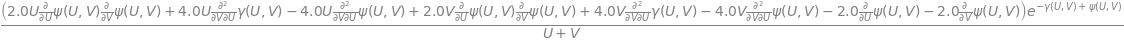

In [19]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [21]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                     2                      2                                              
⎢        ⎛∂          ⎞          ⎛∂          ⎞        ∂                                      
⎢- 0.5⋅U⋅⎜──(ψ(U, V))⎟  - 0.5⋅V⋅⎜──(ψ(U, V))⎟  + 1.0⋅──(γ(U, V))                            
⎢        ⎝∂U         ⎠          ⎝∂U         ⎠        ∂U                                     
⎢───────────────────────────────────────────────────────────────                            
⎢                             U + V                                                         
⎢                                                                                           
⎢                                                                                      2    
⎢                                                                         ⎛∂          ⎞     
⎢                                                                 - 0.5⋅U⋅⎜──(ψ(U, V))⎟  - 0
⎢                                                                     

In [ ]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

In [ ]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

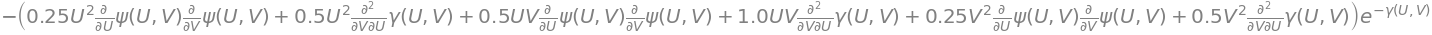

In [22]:
simplify(einst.tensor())[3,3]

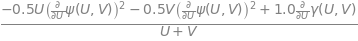

In [23]:
simplify(einst.tensor())[0,0]

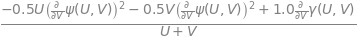

In [24]:
simplify(einst.tensor())[1,1]

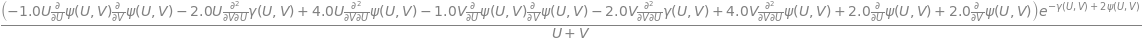

In [25]:
simplify(einst.tensor())[2,2]